In [39]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install rasterio

Note: you may need to restart the kernel to use updated packages.


Loading May-August 2020 S-DoT data...
Loaded 1,391 temperature pairs

Validation Statistics:
Number of sensors: 1,391
Mean Bias (S-DoT - Predicted): 1.837°C
Expected systematic difference: 1.8°C
Difference from expected: 0.037°C
Standard Deviation: 2.058°C
RMSE: 2.759°C
MAE: 2.251°C
CVRMSE: 12.63%
R²: 0.653
Mean predicted temperature: 20.00°C
Mean S-DoT temperature: 21.84°C

Creating validation plots...


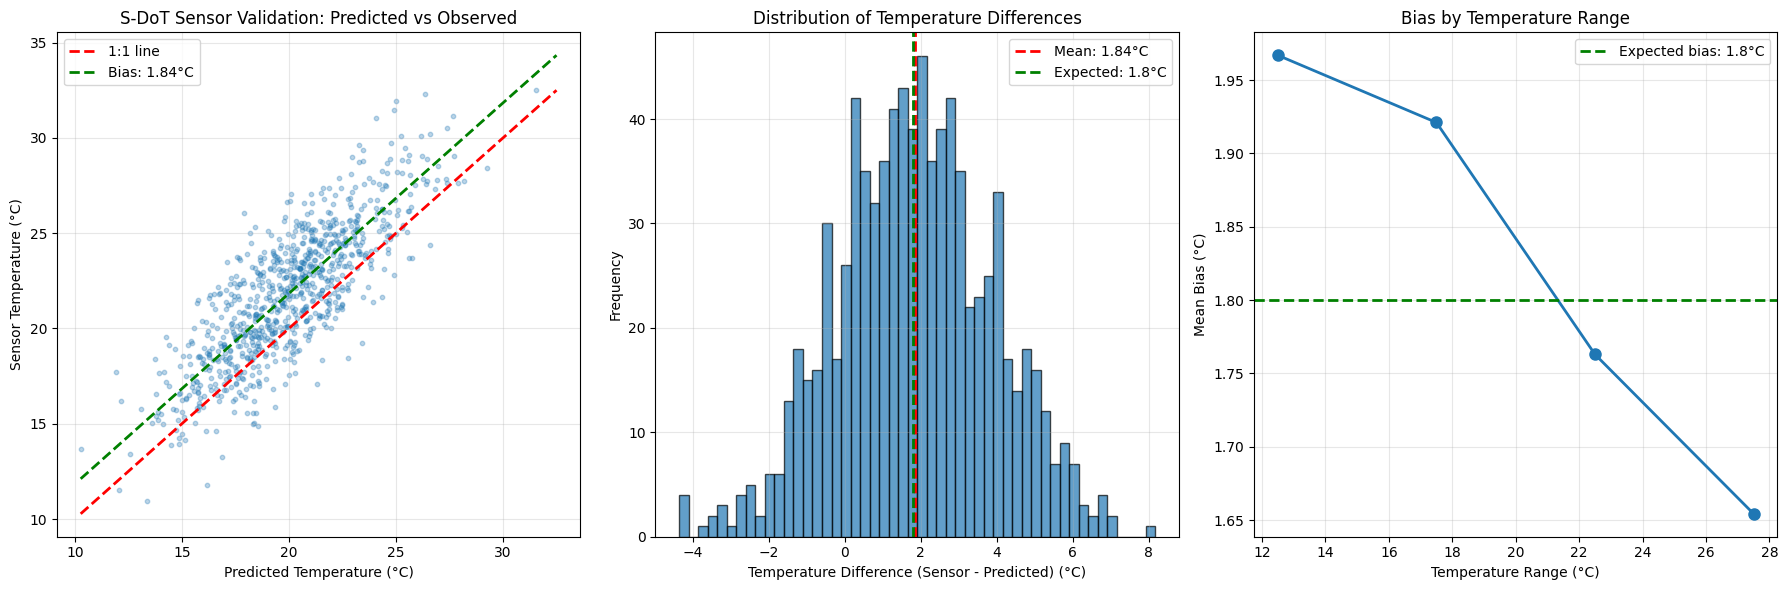

Plots saved to /Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/LST to AT/MLP Result/New Testing S-Dot/Coding/sdot_validation_analysis.png


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set output folder
OUTPUT_FOLDER = '/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/LST to AT/MLP Result/New Testing S-Dot/Coding'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

def create_sensor_validation_plots(y_sensor, y_pred_sensor, bias, bias_std):
    """Create plots for sensor validation"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # 1. Scatter plot
    ax = axes[0]
    ax.scatter(y_pred_sensor, y_sensor, alpha=0.3, s=10)
    
    # Add 1:1 line and bias line
    min_val = min(y_sensor.min(), y_pred_sensor.min())
    max_val = max(y_sensor.max(), y_pred_sensor.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='1:1 line')
    ax.plot([min_val, max_val], [min_val + bias, max_val + bias], 'g--', linewidth=2, label=f'Bias: {bias:.2f}°C')
    
    ax.set_xlabel('Predicted Temperature (°C)')
    ax.set_ylabel('Sensor Temperature (°C)')
    ax.set_title('S-DoT Sensor Validation: Predicted vs Observed')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 2. Histogram of differences
    ax = axes[1]
    differences = y_sensor - y_pred_sensor
    ax.hist(differences, bins=50, alpha=0.7, edgecolor='black')
    ax.axvline(x=bias, color='r', linestyle='--', linewidth=2, label=f'Mean: {bias:.2f}°C')
    ax.axvline(x=1.8, color='g', linestyle='--', linewidth=2, label='Expected: 1.8°C')
    ax.set_xlabel('Temperature Difference (Sensor - Predicted) (°C)')
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of Temperature Differences')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 3. Bias by temperature range
    ax = axes[2]
    temp_bins = np.arange(0, 40, 5)
    bin_indices = np.digitize(y_pred_sensor, temp_bins)
    
    biases = []
    bin_centers = []
    for i in range(1, len(temp_bins)):
        mask = bin_indices == i
        if np.sum(mask) > 10:  # Only if enough samples
            bin_bias = np.mean((y_sensor - y_pred_sensor)[mask])
            biases.append(bin_bias)
            bin_centers.append((temp_bins[i-1] + temp_bins[i]) / 2)
    
    ax.plot(bin_centers, biases, 'o-', linewidth=2, markersize=8)
    ax.axhline(y=1.8, color='g', linestyle='--', linewidth=2, label='Expected bias: 1.8°C')
    ax.set_xlabel('Temperature Range (°C)')
    ax.set_ylabel('Mean Bias (°C)')
    ax.set_title('Bias by Temperature Range')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_FOLDER, 'sdot_validation_analysis.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
def main():
    # Load May-August 2020 data
    print("Loading May-August 2020 S-DoT data...")
    data = pd.read_csv('/Users/geunchansong/Documents/TU:d/Year 2/Graduation Thesis/LST to AT/MLP Result/New Testing S-Dot/May_Aug_2020_sdot_data.csv')
    
    # Extract predicted and sensor temperatures
    pred_temps = data['predicted_temperature'].values
    sensor_temps = data['sdot_temperature'].values
    
    print(f"Loaded {len(pred_temps)} temperature pairs")
    
    # Calculate statistics
    bias = np.mean(sensor_temps - pred_temps)
    bias_std = np.std(sensor_temps - pred_temps)
    rmse = np.sqrt(np.mean((sensor_temps - pred_temps)**2))
    mae = np.mean(np.abs(sensor_temps - pred_temps))
    cvrmse = (rmse / np.mean(sensor_temps)) * 100
    r2 = np.corrcoef(pred_temps, sensor_temps)[0, 1]**2
    
    # Print statistics
    print("\nValidation Statistics:")
    print(f"Number of sensors: {len(sensor_temps)}")
    print(f"Mean Bias (S-DoT - Predicted): {bias:.3f}°C")
    print(f"Expected systematic difference: 1.8°C")
    print(f"Difference from expected: {abs(bias - 1.8):.3f}°C")
    print(f"Standard Deviation: {bias_std:.3f}°C")
    print(f"RMSE: {rmse:.3f}°C")
    print(f"MAE: {mae:.3f}°C")
    print(f"CVRMSE: {cvrmse:.2f}%")
    print(f"R²: {r2:.3f}")
    print(f"Mean predicted temperature: {np.mean(pred_temps):.2f}°C")
    print(f"Mean S-DoT temperature: {np.mean(sensor_temps):.2f}°C")
    
    # Create validation plots
    print("\nCreating validation plots...")
    create_sensor_validation_plots(sensor_temps, pred_temps, bias, bias_std)
    print(f"Plots saved to {OUTPUT_FOLDER}/sdot_validation_analysis.png")

if __name__ == "__main__":
    main()